# Load dataset and Plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('vehicles_1.csv',
                 dtype={
                     'region': 'object',
                     'price': 'int32',
                     'year': 'Int16',
                     'manufacturer': 'object',
                     'model': 'object',
                     'condition': 'object',
                     'cylinders': 'Int16',
                     'fuel': 'object',
                     'odometer': 'Int32',
                     'title_status': 'object',
                     'transmission': 'object',
                     'drive': 'object',
                     'type': 'object',
                     'paint_color': 'object',
                     'state': 'object',
                     'lat': 'float64',
                     'long': 'float64',
                     'posting_date': 'int64',
                     'VIN_country': 'object',
                     'VIN_manufacturer': 'object',
                     'VIN_model_engine_type': 'object',
                     'VIN_security_code': 'object',
                     'VIN_year': 'object',
                     'VIN_plant': 'object'
                 }
                )

In [2]:
list(df.loc[0])

['auburn',
 27990,
 2012,
 'gmc',
 'sierra 2500 hd extended cab',
 'good',
 8,
 'gas',
 68696,
 'clean',
 'other',
 '4wd',
 'pickup',
 'black',
 'al',
 32.59,
 -85.48,
 737913,
 '1',
 'GT',
 '220CG',
 '8',
 'C',
 'Z']

In [3]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

s = (df.dtypes == 'object')
object_cols = list(s[s].index)
low_cardinality_cols = [col for col in object_cols if df[col].nunique() < 10]
#high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))
high_cardinality_cols = ['model', 'region', 'type', 'VIN_country', 'VIN_year', 'VIN_manufacturer', 
                            'VIN_plant', 'manufacturer', 'VIN_model_engine_type', 'paint_color', 'state', 'VIN_security_code']
price = df['price']
df = df.drop(['price'], axis = 1)
print(df.columns)
print(high_cardinality_cols)

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

df[high_cardinality_cols] = ordinal_encoder.fit_transform(df[high_cardinality_cols])

for col in low_cardinality_cols:
    df = onehot_encode(df, col, col+'_')
    
df = pd.concat([df, price], axis=1)
df.head()

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'lat', 'long', 'posting_date', 'VIN_country',
       'VIN_manufacturer', 'VIN_model_engine_type', 'VIN_security_code',
       'VIN_year', 'VIN_plant'],
      dtype='object')
['model', 'region', 'type', 'VIN_country', 'VIN_year', 'VIN_manufacturer', 'VIN_plant', 'manufacturer', 'VIN_model_engine_type', 'paint_color', 'state', 'VIN_security_code']


,region,year,manufacturer,model,cylinders,odometer,type,paint_color,state,lat,...,title_status__parts only,title_status__rebuilt,title_status__salvage,transmission__automatic,transmission__manual,transmission__other,drive__4wd,drive__fwd,drive__rwd,price
0,16.0,2012,14.0,4964.0,8,68696,8.0,0.0,1.0,32.59,...,False,False,False,False,False,True,True,False,False,27990
1,16.0,2016,7.0,5028.0,6,29499,8.0,9.0,1.0,32.59,...,False,False,False,False,False,True,True,False,False,34590
2,16.0,2016,7.0,1532.0,6,17302,8.0,8.0,1.0,32.59,...,False,False,False,False,False,True,True,False,False,29990
3,16.0,2011,7.0,1634.0,8,30237,7.0,8.0,1.0,32.59,...,False,False,False,False,False,True,False,False,True,38590
4,16.0,2017,20.0,5995.0,6,30041,7.0,9.0,1.0,32.59,...,False,False,False,False,False,True,True,False,False,32990


In [4]:
import pickle

pickle.dump(ordinal_encoder,open('ordinal_encoder.pkl','wb'))

pickle_encoder = pickle.load(open('ordinal_encoder.pkl','rb'))
df[high_cardinality_cols] = pickle_encoder.transform(df[high_cardinality_cols])
df.head()

array([[<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'manufacturer'}>,
        <Axes: title={'center': 'model'}>],
       [<Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'paint_color'}>],
       [<Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'posting_date'}>],
       [<Axes: title={'center': 'VIN_country'}>,
        <Axes: title={'center': 'VIN_manufacturer'}>,
        <Axes: title={'center': 'VIN_model_engine_type'}>,
        <Axes: title={'center': 'VIN_security_code'}>],
       [<Axes: title={'center': 'VIN_year'}>,
        <Axes: title={'center': 'VIN_plant'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

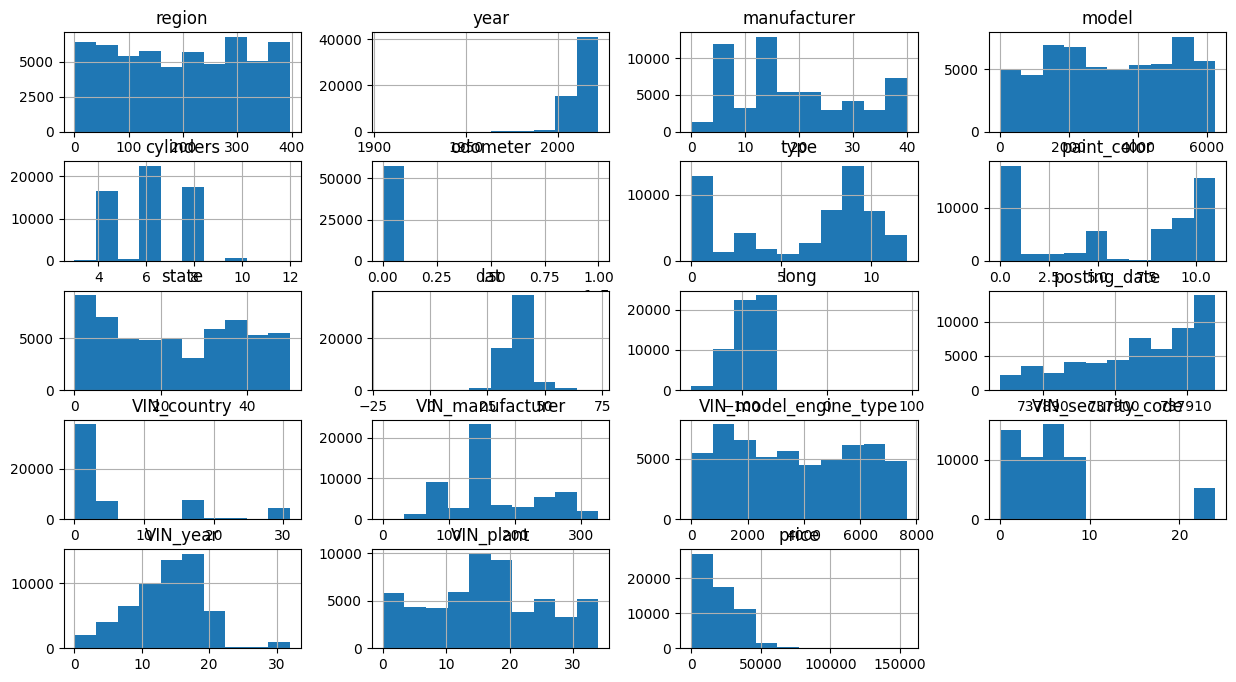

In [5]:
df.hist(figsize=(15,8))

<Axes: >

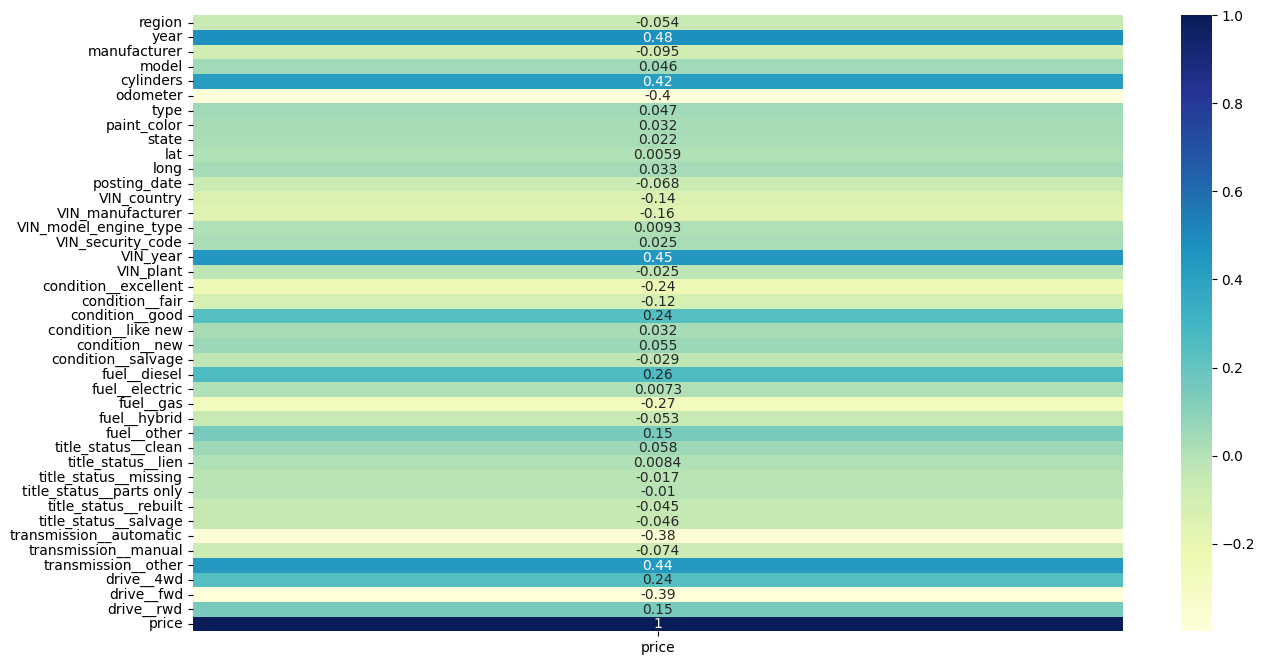

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr()[['price']], annot=True, cmap='YlGnBu')

<Axes: xlabel='lat', ylabel='long'>

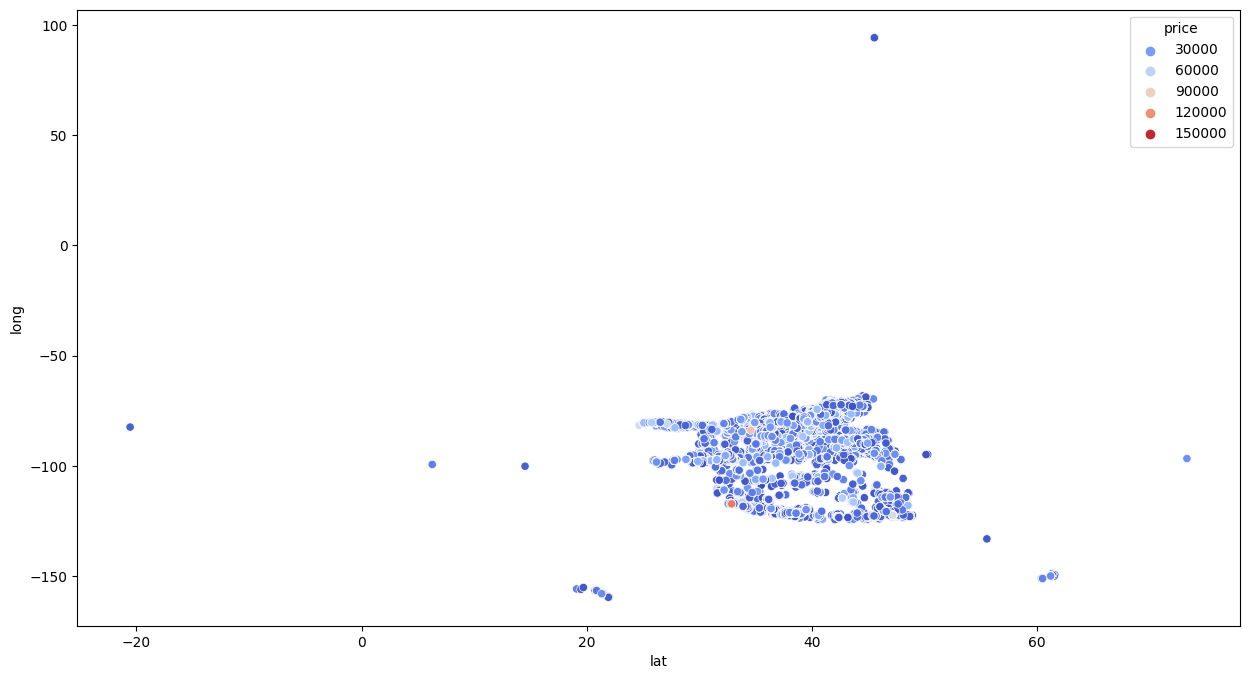

In [7]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='lat', y='long', data=df, hue='price', palette='coolwarm')

# Train Test Split, Scale

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ordered_cols = ['region', 'year', 'manufacturer', 'model', 'cylinders', 'odometer',
       'type', 'paint_color', 'state', 'lat', 'long', 'posting_date',
       'VIN_country', 'VIN_manufacturer', 'VIN_model_engine_type',
       'VIN_security_code', 'VIN_year', 'VIN_plant', 'condition__excellent',
       'condition__fair', 'condition__good', 'condition__like new',
       'condition__new', 'condition__salvage', 'fuel__diesel',
       'fuel__electric', 'fuel__gas', 'fuel__hybrid', 'fuel__other',
       'title_status__clean', 'title_status__lien', 'title_status__missing',
       'title_status__parts only', 'title_status__rebuilt',
       'title_status__salvage', 'transmission__automatic',
       'transmission__manual', 'transmission__other', 'drive__4wd',
       'drive__fwd', 'drive__rwd']

df = df.dropna()
df = df.reset_index()

X = df.drop(['price','index'], axis = 1)
X = X[ordered_cols]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
print(X.columns)

Index(['region', 'year', 'manufacturer', 'model', 'cylinders', 'odometer',
       'type', 'paint_color', 'state', 'lat', 'long', 'posting_date',
       'VIN_country', 'VIN_manufacturer', 'VIN_model_engine_type',
       'VIN_security_code', 'VIN_year', 'VIN_plant', 'condition__excellent',
       'condition__fair', 'condition__good', 'condition__like new',
       'condition__new', 'condition__salvage', 'fuel__diesel',
       'fuel__electric', 'fuel__gas', 'fuel__hybrid', 'fuel__other',
       'title_status__clean', 'title_status__lien', 'title_status__missing',
       'title_status__parts only', 'title_status__rebuilt',
       'title_status__salvage', 'transmission__automatic',
       'transmission__manual', 'transmission__other', 'drive__4wd',
       'drive__fwd', 'drive__rwd'],
      dtype='object')


# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

reg_s = LinearRegression()
reg_s.fit(X_train_s, y_train)

reg_score = reg.score(X_test, y_test)
reg_s_score = reg_s.score(X_test_s, y_test)

print('Regular: {0}\nScaled:  {1}'.format(reg_score, reg_s_score))

Regular: 0.6388772378330843
Scaled:  0.6390268030534801


# Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

forest_s = RandomForestRegressor()
forest_s.fit(X_train_s, y_train)

forest_score = forest.score(X_test, y_test)
forest_s_score = forest_s.score(X_test_s, y_test)

print('Regular: {0}\nScaled:  {1}'.format(forest_score, forest_s_score))

Regular: 0.9327510059446331
Scaled:  0.9327884515194336


In [11]:
X_test.iloc[0]

region                          126.0
year                             2006
manufacturer                     16.0
model                          1424.0
cylinders                           4
odometer                       151000
type                              3.0
paint_color                       8.0
state                            22.0
lat                         42.868176
long                       -85.863137
posting_date                   737900
VIN_country                       2.0
VIN_manufacturer                171.0
VIN_model_engine_type          3251.0
VIN_security_code                 4.0
VIN_year                          6.0
VIN_plant                        17.0
condition__excellent             True
condition__fair                 False
condition__good                 False
condition__like new             False
condition__new                  False
condition__salvage              False
fuel__diesel                    False
fuel__electric                  False
fuel__gas   

In [12]:
forest.predict(X_test.iloc[0].values.reshape(1, -1))

/home/babagata/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5043.16])

In [13]:
import pickle

pickle.dump(forest, open('random_forest_model.pkl','wb'))

In [14]:
pickle_model = pickle.load(open('random_forest_model.pkl','rb'))

In [15]:
pickle_model.predict(X_test.iloc[0].values.reshape(1, -1))

/home/babagata/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5043.16])